In [114]:
import numpy as np
import matplotlib.pyplot as plt

In [115]:
# Define 4 ODE 
n_step = 100
v_r = np.zeros(n_step)
v_theta = np.zeros(n_step)
r = np.zeros(n_step)
theta = np.zeros(n_step)

#Setting initial conditions
v_r[0] = 19400
v_theta[0] = 2 * np.pi / 86400
r[0] = 146608000000
theta = np.linspace(0, 2 * np.pi, n_step)
# theta[0] = 0.001


# Take in energy and angular momentum to initiate

G = 6.674e-11
L = 2.67e40
dt = 0.01

In [116]:
for i in range(n_step-1):
    # Use k g h l as value storers in each rk4 step
    k1 = v_r[i]
    # g1 = v_theta[i]
    h1 = r[i] * v_theta[i] **2 - G * L / r[i]**2
    l1 = -2 * v_r[i] * v_theta[i] / r[i]

    r_tempt_1 = r[i] + k1 * dt/2
    # theta_tempt_1 = theta[i] + g1 * dt /2
    v_r_tempt_1 = v_r[i] + h1 * dt /2
    v_theta_tempt_1 = v_theta[i] + l1 * dt/2

    # Step 2
    k2 = v_r_tempt_1
    # g2 = v_theta_tempt_1
    h2 = r_tempt_1 * v_theta_tempt_1 **2 - G * L / r_tempt_1**2
    l2 = -2 * v_r_tempt_1 * v_theta_tempt_1 / r_tempt_1

    r_tempt_2 = r[i] + k2 * dt/2
    # theta_tempt_2 = theta[i] + g2 * dt /2
    v_r_tempt_2 = v_r[i] + h2 * dt /2
    v_theta_tempt_2 = v_theta[i] + l2 * dt/2

    # Step 3
    k3 = v_r_tempt_2
    # g3 = v_theta_tempt_2
    h3 = r_tempt_2 * v_theta_tempt_2 **2 - G * L / r_tempt_2**2
    l3 = -2 * v_r_tempt_2 * v_theta_tempt_2 / r_tempt_2

    r_tempt_3 = r[i] + k3 * dt/2
    # theta_tempt_3 = theta[i] + g3 * dt /2
    v_r_tempt_3 = v_r[i] + h3 * dt /2
    v_theta_tempt_3 = v_theta[i] + l3 * dt/2

    # Step 4
    k4 = v_r_tempt_3
    # g4 = v_theta_tempt_3
    h4 = r_tempt_3 * v_theta_tempt_3 **2 - G * L / r_tempt_3**2
    l4 = -2 * v_r_tempt_3 * v_theta_tempt_3 / r_tempt_3

    r[i+1] = r[i] + dt * (k1 + 2* k2 + 2*k3 + k4)/ 6
    # theta[i+1] = theta[i] + dt * (g1 + 2* g2 + 2*g3 + g4)/ 6
    v_r[i+1] = v_r[i] + dt * (h1 + 2* h2 + 2*h3 + h4)/ 6
    v_theta[i+1] = v_theta[i] + dt * (l1 + 2* l2 + 2*l3 + l4)/ 6




In [117]:
x = r * np.cos(theta)
y = r * np.sin(theta)

Text(0.5, 1.0, 'RK4 Orbit')

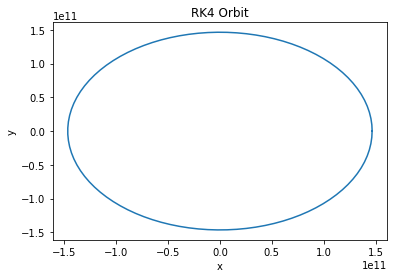

In [118]:
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('RK4 Orbit')

In [119]:
# Comparison to analytical method
m1 = 1.989e30 #sun mass
m2 = 5.97219e24 # earth mass
m = (m1 * m2) / (m1 + m2)
alpha = G * m1 * m2
a = 1.495e11
e = 0.017
theta = np.linspace(0, 2 * np.pi, 100)

p = L**2 / m / alpha
 # to check
p2 = a * (1 - e)**2
print(p)
print(p2)

r = p / (1 + e * np.cos(theta))

x_ana = r * np.cos(theta)
y_ana = r * np.sin(theta)



150569015012.38382
144460205500.0


Text(0.5, 1.0, 'Analytical Orbit')

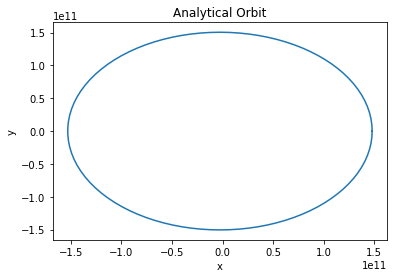

In [120]:
plt.plot(x_ana, y_ana)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Analytical Orbit')

In [123]:
# Error analysis
np.mean((x - x_ana) / x_ana), np.mean((y - y_ana) / y_ana)

/var/folders/pb/nsj6z9cj023fgm71bp0lkc240000gn/T/ipykernel_63958/3639965294.py:2: RuntimeWarning: invalid value encountered in true_divide
  np.mean((x - x_ana) / x_ana), np.mean((y - y_ana) / y_ana)


(-0.026231808386973313, nan)

In [144]:
# Playing with other potentials 
# Define 4 ODE 
n_step = 100
v_r = np.zeros(n_step)
v_theta = np.zeros(n_step)
r = np.zeros(n_step)
theta = np.zeros(n_step)

#Setting initial conditions
v_r[0] = 19400
v_theta[0] = 2 * np.pi / 86400
r[0] = 146608000000
theta = np.linspace(0, 2 * np.pi, n_step)
# theta[0] = 0.001


# Take in energy and angular momentum to initiate

G = 6.674e-11
# L = 2.67e40
dt = 0.01

In [145]:
for i in range(n_step-1):
    L = r[i-1]**2 # Spherically symmetric
    # Use k g h l as value storers in each rk4 step
    k1 = v_r[i]
    # g1 = v_theta[i]
    h1 = r[i] * v_theta[i] **2 - G * L / r[i]**2
    l1 = -2 * v_r[i] * v_theta[i] / r[i]

    r_tempt_1 = r[i] + k1 * dt/2
    # theta_tempt_1 = theta[i] + g1 * dt /2
    v_r_tempt_1 = v_r[i] + h1 * dt /2
    v_theta_tempt_1 = v_theta[i] + l1 * dt/2

    # Step 2
    k2 = v_r_tempt_1
    # g2 = v_theta_tempt_1
    h2 = r_tempt_1 * v_theta_tempt_1 **2 - G * L / r_tempt_1**2
    l2 = -2 * v_r_tempt_1 * v_theta_tempt_1 / r_tempt_1

    r_tempt_2 = r[i] + k2 * dt/2
    # theta_tempt_2 = theta[i] + g2 * dt /2
    v_r_tempt_2 = v_r[i] + h2 * dt /2
    v_theta_tempt_2 = v_theta[i] + l2 * dt/2

    # Step 3
    k3 = v_r_tempt_2
    # g3 = v_theta_tempt_2
    h3 = r_tempt_2 * v_theta_tempt_2 **2 - G * L / r_tempt_2**2
    l3 = -2 * v_r_tempt_2 * v_theta_tempt_2 / r_tempt_2

    r_tempt_3 = r[i] + k3 * dt/2
    # theta_tempt_3 = theta[i] + g3 * dt /2
    v_r_tempt_3 = v_r[i] + h3 * dt /2
    v_theta_tempt_3 = v_theta[i] + l3 * dt/2

    # Step 4
    k4 = v_r_tempt_3
    # g4 = v_theta_tempt_3
    h4 = r_tempt_3 * v_theta_tempt_3 **2 - G * L / r_tempt_3**2
    l4 = -2 * v_r_tempt_3 * v_theta_tempt_3 / r_tempt_3

    r[i+1] = r[i] + dt * (k1 + 2* k2 + 2*k3 + k4)/ 6
    # theta[i+1] = theta[i] + dt * (g1 + 2* g2 + 2*g3 + g4)/ 6
    v_r[i+1] = v_r[i] + dt * (h1 + 2* h2 + 2*h3 + h4)/ 6
    v_theta[i+1] = v_theta[i] + dt * (l1 + 2* l2 + 2*l3 + l4)/ 6


x = r * np.cos(theta)
y = r * np.sin(theta)

/var/folders/pb/nsj6z9cj023fgm71bp0lkc240000gn/T/ipykernel_63958/3418111515.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  L = 1/r[i-1]
/var/folders/pb/nsj6z9cj023fgm71bp0lkc240000gn/T/ipykernel_63958/3418111515.py:29: RuntimeWarning: invalid value encountered in double_scalars
  h3 = r_tempt_2 * v_theta_tempt_2 **2 - G * L / r_tempt_2**2
/var/folders/pb/nsj6z9cj023fgm71bp0lkc240000gn/T/ipykernel_63958/3418111515.py:30: RuntimeWarning: invalid value encountered in double_scalars
  l3 = -2 * v_r_tempt_2 * v_theta_tempt_2 / r_tempt_2
/var/folders/pb/nsj6z9cj023fgm71bp0lkc240000gn/T/ipykernel_63958/3418111515.py:40: RuntimeWarning: invalid value encountered in double_scalars
  h4 = r_tempt_3 * v_theta_tempt_3 **2 - G * L / r_tempt_3**2


Text(0.5, 1.0, 'RK4 Orbit')

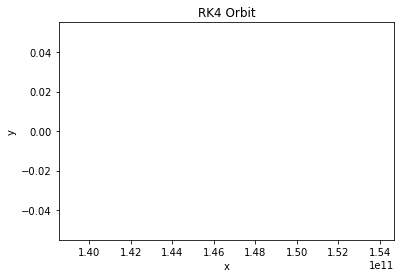

In [146]:
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('RK4 Orbit')